# ***Student Name: Tushar Panchal***

# ***En. No. : 21162101014***

# ***Branch: CBA***

# ***Batch:  61***

# ***Subject: DMW (Data Mining & Warehousing)***

# **PRACTICAL-5 Text Mining**
Using the "tweet_data.csv" dataset, answer the following questions:

**Text Mining:**

1) Find the total number of tweets.

2) Find the total number of unique tweets.

3) Find out the text and sentiments of a particular tweet with the help of IDs associated with it, as well as its index.

4) Find out the total number of positive and negative tweets


**Data Visualization:**

5) Plot a graph that shows the number of positive and negative tweets   in percentage. Also plot different representation.

6) Plot a word cloud that shows all the words that are  most frequently used in positive and negative tweets.



**Data Cleaning:**

7) Select any random retweet and Display its actual text by removing RT

8) Select any random tweet and remove following things from that:
hashtags
@handle
After removal, display actual tweet text


9) Select a random tweet with emoji in it and re-display its actual text by replacing the emoji to word in text


In [1]:
from google.colab import files
uploaded =files.upload()

Saving tweet_data.csv to tweet_data.csv


In [2]:
ls

sample_data/  tweet_data.csv


In [3]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO (uploaded ["tweet_data.csv"]))

In [6]:
df

,textID,tweet_text,sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative
1,1956967696,Funeral ceremony...gloomy friday...,negative
2,1956967789,wants to hang out with friends SOON!,positive
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative
...,...,...,...
18722,1753918818,"had SUCH and AMAZING time last night, McFly we...",positive
18723,1753918881,@jasimmo Ooo showing of your French skills!! l...,positive
18724,1753918900,Succesfully following Tayla!!,positive
18725,1753919001,Happy Mothers Day All my love,positive


1) Find the total number of tweets.

In [8]:
len(df)

18727

2) Find the total number of unique tweets.

In [9]:
df['tweet_text'].nunique()

18615


3) Find out the text and sentiments of a particular tweet with the help of IDs associated with it, as well as its index.

In [10]:
df[df["textID"]==1956967666]

,textID,tweet_text,sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative


In [11]:
df.iloc[20]

textID                             1956975860
tweet_text    I missed the bl***y bus!!!!!!!!
sentiment                            negative
Name: 20, dtype: object

4) Find out the total number of positive and negative tweets

In [12]:
df[df['sentiment']=='positive']['textID'].count()

9897

In [13]:
df[df['sentiment']=='negative']['textID'].count()

8830

# **Data Visualization:**


5) Plot a graph that shows the number of positive and negative tweets in percentage. Also plot different representation.

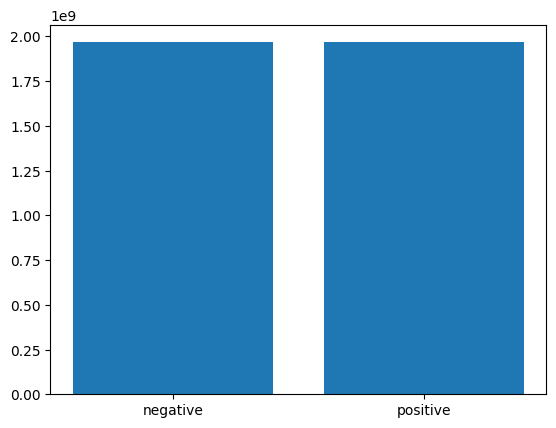

In [ ]:
import matplotlib.pyplot as plt
x = df.sentiment
y = df.textID
plt.bar(x,y)
plt.show()

<Axes: >

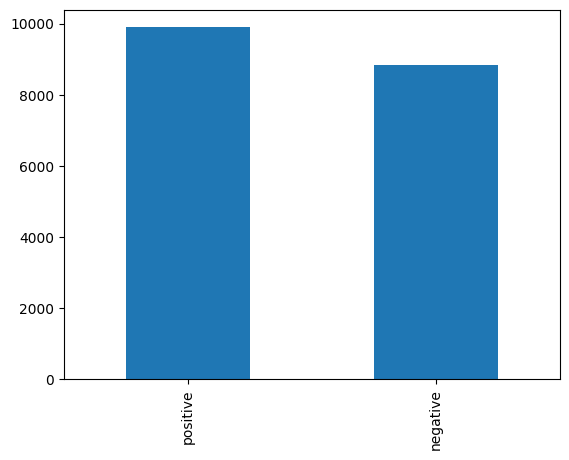

In [ ]:
df["sentiment"].value_counts().plot(kind="bar")

<Axes: ylabel='sentiment'>

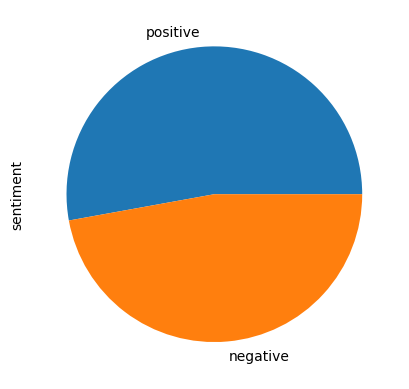

In [ ]:
df["sentiment"].value_counts().plot(kind="pie")

([<matplotlib.patches.Wedge at 0x7c059a5e63e0>,
 [Text(0.46710419804702996, -0.9958984226148976, 'positive'),
  Text(-0.46710419804703074, 0.9958984226148972, 'negative')],
 [Text(0.2547841080256527, -0.5432173214263077, '52.8%'),
  Text(-0.2547841080256531, 0.5432173214263075, '47.2%')])

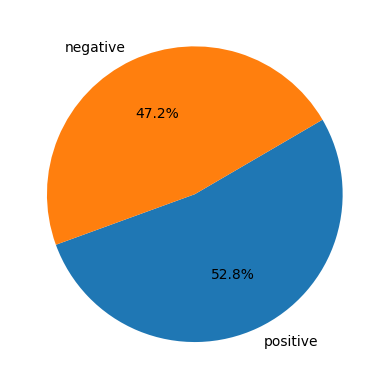

In [ ]:
plt.pie(df['sentiment'].value_counts(), labels=df['sentiment'].value_counts().index, startangle=200, autopct='%1.1f%%')

6) Plot a word cloud that shows all the words that are most frequently used in positive and negative tweets.

In [ ]:
!pip install -d wordcloud


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -d


In [ ]:
from wordcloud import WordCloud

In [ ]:
positive_tweet = df[df['sentiment']=='positive']
text = " ".join(tweet.lower() for tweet in positive_tweet['tweet_text'])

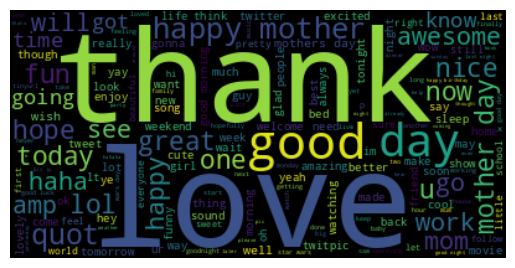

In [ ]:
worldcloud = WordCloud().generate(text)
plt.imshow(worldcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

# **Data Cleaning:**

7) Select any random retweet and Display its actual text by removing RT

In [14]:
tweet=df[df['tweet_text'].str.contains("rt")]

In [15]:
tweet

,textID,tweet_text,sentiment
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative
18,1956974706,It is so annoying when she starts typing on he...,negative
32,1956981427,"bed...sorta. today was good, sara has strep th...",positive
34,1956982605,I want to buy this great album but unfortunate...,negative
43,1956987600,dammit! hulu desktop has totally screwed up my...,negative
...,...,...,...
18690,1753903299,"happy mothers day to all the mothers, grandmot...",positive
18703,1753903904,"@balkanbeat No, a-ha is unfortunatelly from No...",negative
18706,1753904145,Gooood party last night (: Although I am extre...,positive
18711,1753904448,"@McMedia Very well thank you! How are you, mor...",positive


In [16]:
tweet=df.iloc[18712]['tweet_text']

In [17]:
tweet

'@Rtib happy birthday'

In [18]:
import re

In [21]:
def replace_tweet(tweet_d,default_replace=' '):
  tweet_d=re.sub('Rt',default_replace,tweet_d)
  return tweet_d
print("PROcessed Tweet : {}".format(replace_tweet(tweet)))

PROcessed Tweet : @ ib happy birthday


8) Select any random tweet and remove following things from that: hashtags @handle After removal, display actual tweet text

In [23]:
tweet1=df.iloc[5]['tweet_text']+"   #saddd"

In [24]:
tweet1

'@charviray Charlene my love. I miss you   #saddd'

In [25]:
def replace_hashtag(tweet_d):
  tweet_d = re.sub(r'#','',tweet_d)
  return replace_handle(tweet_d)
def replace_handle(tweet_d):
  tweet_d = re.sub(r'@','',tweet_d)
  return tweet_d
print("\nCleaned Tweet: {}".format(replace_hashtag(tweet1)))


Cleaned Tweet: charviray Charlene my love. I miss you   saddd


In [31]:
!pip install emoji

9) Select a random tweet with emoji in it and re-display its actual text by replacing the emoji to word in text


In [35]:
tweet='my name is Tushar Panchal  🤣🤣🤣🤣🤣🤣🤣🤣'

In [36]:
import emoji
def demojize(tweet_d):
  tweet_d = emoji.demojize(tweet_d)
  return tweet_d
print('Tweet : {}'.format(demojize(tweet)))

Tweet : my name is Tushar Panchal  :rolling_on_the_floor_laughing::rolling_on_the_floor_laughing::rolling_on_the_floor_laughing::rolling_on_the_floor_laughing::rolling_on_the_floor_laughing::rolling_on_the_floor_laughing::rolling_on_the_floor_laughing::rolling_on_the_floor_laughing:


In [37]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
stopwords = set(stopwords.words("english"))
print(stopwords)

{"doesn't", 'herself', 'some', "shouldn't", 'same', 'doing', 'few', "haven't", 'own', 'then', 're', 'what', 'here', 'm', 'has', 'at', 'be', 'did', 'these', 'having', 'where', 'whom', 'is', 'if', 'who', 'couldn', 'my', 'myself', 'shouldn', 'his', 'and', 'were', 'after', 'ma', "it's", 'aren', 'until', 'with', 'no', 've', 'hers', 'ours', 'mightn', 'does', 'from', 'because', 'can', "shan't", 'had', 'in', "she's", "didn't", 'it', 'before', "you'd", 'there', 'are', 'for', 's', "you'll", 'further', 'was', 'she', 'do', 'down', 'why', 'not', 'under', 'hasn', 'me', 'they', 'our', 'you', 'him', 'only', 'very', 'too', 'between', 'needn', 'wouldn', 'such', "that'll", 'other', 'doesn', 'both', 'again', 'while', 'should', 'against', 'nor', 'the', 'wasn', "won't", 'shan', 'd', 'itself', "wasn't", 'am', 'their', 'each', 'any', 'ain', "don't", 'a', "you're", 'o', 'off', 'y', "hadn't", 'theirs', "hasn't", "needn't", 'most', 'but', 'himself', 'or', "wouldn't", 'ourselves', 'them', 'been', 'above', 'hadn',

11) Perform tokenization on some raw text and display statements as well as words

In [40]:
token = "Hello Everyone!! Have great day. DMW is working out!!"
def tokenize1(tweet_d):
  token_t = sent_tokenize(tweet_d)
  return token_t
def tokenize(tweet_d):
  token_d = word_tokenize(tweet_d)
  return token_d
print("\n Tokenize for Word:",tokenize(token))
print("\n Tokenize for Sentence",tokenize1(token))


 Tokenize for Word: ['Hello', 'Everyone', '!', '!', 'Have', 'great', 'day', '.', 'DMW', 'is', 'working', 'out', '!', '!']

 Tokenize for Sentence ['Hello Everyone!!', 'Have great day.', 'DMW is working out!', '!']
